
# Data processing for flir archives
![](2024-08-14-18-03-16.png)
## Author: Juan Daniel Vasconez
## Last Update: 12/8/2024
## Project: Volcanes_ML
## Contact: juanda@diversa.studio
---

### 1.- Enviroment Preparation

#### Flirpy Library Instaltion

In [15]:
# Clone the repo
!git clone https://github.com/LJMUAstroecology/flirpy.git
%cd flirpy
# Install the dependencies
!pip install -r requirements.txt

# Install the library locally
!pip install .

c:\Users\diana\Documents\Diversa\epn\volcanes_ml\scripts\flirpy\flirpy\flirpy\flirpy


'DOSKEY' is not recognized as an internal or external command,
operable program or batch file.
Cloning into 'flirpy'...


  Using cached pyserial-3.5-py2.py3-none-any.whl (90 kB)
  Using cached opencv_python_headless-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)
  Using cached pyudev-0.24.3-py3-none-any.whl (62 kB)
  Using cached libusb-1.0.27-py3-none-any.whl (581 kB)
  Using cached pyusb-1.2.1-py3-none-any.whl (58 kB)
  Using cached pyftdi-0.55.4-py3-none-any.whl (145 kB)
  Using cached natsort-8.4.0-py3-none-any.whl (38 kB)


'DOSKEY' is not recognized as an internal or external command,
operable program or batch file.
ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'c:\\users\\diana\\anaconda3\\lib\\site-packages\\numpy-1.24.3.dist-info\\METADATA'



Processing c:\users\diana\documents\diversa\epn\volcanes_ml\scripts\flirpy\flirpy\flirpy\flirpy
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for flirpy: filename=flirpy-0.4.0-py3-none-any.whl size=10188306 sha256=e2799aa8e98b15c25a42db285f89c40b08f2d8627e2212ec8e3466f37264b115
  Stored in directory: C:\Users\diana\AppData\Local\Temp\pip-ephem-wheel-cache-xnrsw912\wheels\8e\e4\90\31614807abc42b6c69ab8e47997df895512b501a6433fff968
Successfully built flirpy
  Attempting uninstall: flirpy
    Found existing installation: flirpy 0.4.0
    Uninstalling flirpy-0.4.0:
      Successfully uninstalled flirpy-0.4.0


'DOSKEY' is not recognized as an internal or external command,
operable program or batch file.


#### Instalations And imports

In [ ]:
%pip install matplotlib
%pip install pandas
%pip install numpy
import matplotlib.pyplot as plt
import pandas as pd
from flirpy.io.fff import Fff
import numpy as np

### 2.- .fff Archives decode example and usage


In [4]:
# FFF paths
file_paths = [
    'C:/Users/sedig/OneDrive/Escritorio/DIVERSA/VOLCANES/Cotopaxi/SET_datos_volcan_Cotopaxi_00-03/2022_RumIR_mix/CTP_RUMHIR_20220805_2015.fff',
    'C:/Users/sedig/OneDrive/Escritorio/DIVERSA/VOLCANES/Cotopaxi/SET_datos_volcan_Cotopaxi_00-03/2022_RumIR_mix/CTP_RUMHIR_20220807_0035.fff'
]

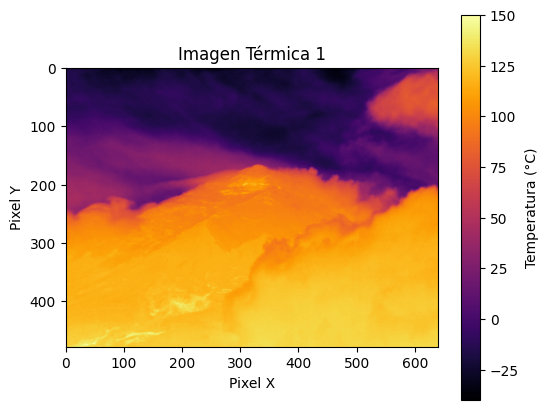

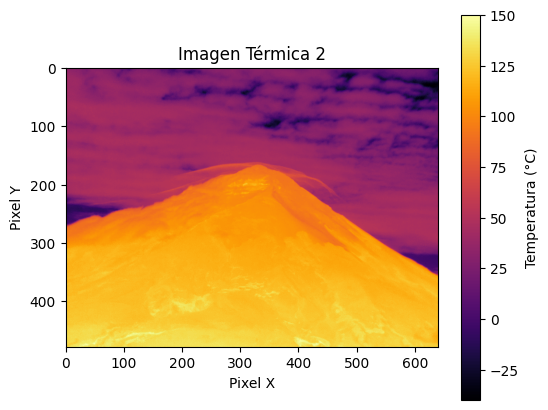

In [7]:
metadata_list = []

for i, file_path in enumerate(file_paths):
    # Load an FFF file
    fff_reader = Fff(file_path)

    # Read the thermal image
    thermal_image = fff_reader.get_image()

    # Extract the metadata
    metadata = fff_reader.meta
    metadata['file_path'] = file_path
    metadata_list.append(metadata)
    # Get the temperature range from the metadata
    min_temp = float(metadata['CameraTemperatureRangeMin'])
    max_temp = float(metadata['CameraTemperatureRangeMax'])

    # Normalize the thermal image to the known temperature range
    thermal_image_normalized = (thermal_image - thermal_image.min()) / (thermal_image.max() - thermal_image.min())
    thermal_image_celsius = thermal_image_normalized * (max_temp - min_temp) + min_temp

    # Create a new figure for each thermal image
    plt.figure(figsize=(6, 5))
    plt.imshow(thermal_image_celsius, cmap='inferno', vmin=min_temp, vmax=max_temp)
    plt.colorbar(label='Temperature (°C)')
    plt.title(f'Thermal Image {i+1}')
    plt.xlabel('Pixel X')
    plt.ylabel('Pixel Y')
    plt.show()

### 3.- MetaData Visualization

In [8]:

# Convert the list of dictionaries into a dataframe
df_metadata = pd.DataFrame(metadata_list)

# Display the dataframe
df_metadata.head()

,Width,Height,Emissivity,Object Distance,Reflected Apparent Temperature,Atmospheric Temperature,IR Window Temperature,IR Window Transmission,Relative Humidity,Planck R1,...,FilterSerialNumber,LensPartNumber,LensSerialNumber,FieldOfView,FocusStepCount,FocusDistance,FrameRate,Timestamp,Datetime (UTC),file_path
0,640,480,0.95,1.0,20.009994,20.009994,20.009994,1.0,0.5,15156.728516,...,b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...,b'T197524\x00\x00\x00\x00\x00\x00\x00\x00\x00',b'56705358\x00\x00\x00\x00\x00\x00\x00\x00',15.000324,3690,56.695999,50,1659748410,2022-08-05 20:13:30,C:/Users/sedig/OneDrive/Escritorio/DIVERSA/VOL...
1,640,480,0.95,1.0,20.009994,20.009994,20.009994,1.0,0.5,15156.728516,...,b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...,b'T197524\x00\x00\x00\x00\x00\x00\x00\x00\x00',b'56705358\x00\x00\x00\x00\x00\x00\x00\x00',15.000324,3641,62.770000,50,1659850411,2022-08-07 00:33:31,C:/Users/sedig/OneDrive/Escritorio/DIVERSA/VOL...
